In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ams10.csv')
df.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,HgYmin,HgXmax,HgYmax,Intersection,Included_Center,Intersection_Area,Hg_Area,Distance,Ground_Truth,GT
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,176.115577,425.699604,203.980340,Center_left,1,844.925198,881.508223,136.120892,1,GBC
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,176.050999,425.668627,203.878841,Center_left,1,848.952861,892.193796,136.317231,1,GBC
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,175.932056,425.627609,203.722820,Center_left,1,837.705837,890.243298,136.384041,1,GBC
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,177.653896,423.709709,202.787083,Center_left,1,613.789372,763.579688,136.939795,1,GBC
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,177.582060,423.771116,202.885134,Center_left,1,611.643926,767.067283,136.847188,1,GBC


In [3]:
len(df)

18345

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18345 entries, 0 to 18344
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              18345 non-null  int64  
 1   N_Person           18345 non-null  int64  
 2   Xcenter            18345 non-null  float64
 3   Ycenter            18345 non-null  float64
 4   PerXmin            18345 non-null  float64
 5   PerYmin            18345 non-null  float64
 6   PerXmax            18345 non-null  float64
 7   PerYmax            18345 non-null  float64
 8   N_Handgun          18345 non-null  int64  
 9   HgXcenter          18345 non-null  float64
 10  HgYcenter          18345 non-null  float64
 11  HgXmin             18345 non-null  float64
 12  HgYmin             18345 non-null  float64
 13  HgXmax             18345 non-null  float64
 14  HgYmax             18345 non-null  float64
 15  Intersection       18345 non-null  object 
 16  Included_Center    183

In [5]:
df.nunique()

Frame                 1933
N_Person                 5
Xcenter              14097
Ycenter              14078
PerXmin              14105
PerYmin              14102
PerXmax              14105
PerYmax              14082
N_Handgun                5
HgXcenter             7258
HgYcenter             7256
HgXmin                7260
HgYmin                7260
HgXmax                7260
HgYmax                7259
Intersection             9
Included_Center          2
Intersection_Area     8307
Hg_Area               7260
Distance             18345
Ground_Truth             2
GT                       2
dtype: int64

In [6]:
df['Ground_Truth'].value_counts()

0    15995
1     2350
Name: Ground_Truth, dtype: int64

In [7]:
df2 = pd.get_dummies(df,columns=['Intersection'])
df2.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,GT,Intersection_Center_left,Intersection_Center_right,Intersection_Down_center,Intersection_Down_left,Intersection_Inside,Intersection_No_intersection,Intersection_Up_center,Intersection_Up_left,Intersection_Up_right
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,GBC,1,0,0,0,0,0,0,0,0
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,GBC,1,0,0,0,0,0,0,0,0
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,GBC,1,0,0,0,0,0,0,0,0
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,GBC,1,0,0,0,0,0,0,0,0
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,GBC,1,0,0,0,0,0,0,0,0


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18345 entries, 0 to 18344
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18345 non-null  int64  
 1   N_Person                      18345 non-null  int64  
 2   Xcenter                       18345 non-null  float64
 3   Ycenter                       18345 non-null  float64
 4   PerXmin                       18345 non-null  float64
 5   PerYmin                       18345 non-null  float64
 6   PerXmax                       18345 non-null  float64
 7   PerYmax                       18345 non-null  float64
 8   N_Handgun                     18345 non-null  int64  
 9   HgXcenter                     18345 non-null  float64
 10  HgYcenter                     18345 non-null  float64
 11  HgXmin                        18345 non-null  float64
 12  HgYmin                        18345 non-null  float64
 13  H

# Random Forest 
## Todos los predictores

In [9]:
pred = dict(zip(df2.Ground_Truth.unique(),df2.GT.unique()))
print(pred)

{1: 'GBC', 0: 'MLP'}


In [10]:
print(df2['Ground_Truth'].value_counts())

0    15995
1     2350
Name: Ground_Truth, dtype: int64


In [11]:
df3 = df2.drop(columns=["GT"])

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18345 entries, 0 to 18344
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18345 non-null  int64  
 1   N_Person                      18345 non-null  int64  
 2   Xcenter                       18345 non-null  float64
 3   Ycenter                       18345 non-null  float64
 4   PerXmin                       18345 non-null  float64
 5   PerYmin                       18345 non-null  float64
 6   PerXmax                       18345 non-null  float64
 7   PerYmax                       18345 non-null  float64
 8   N_Handgun                     18345 non-null  int64  
 9   HgXcenter                     18345 non-null  float64
 10  HgYcenter                     18345 non-null  float64
 11  HgXmin                        18345 non-null  float64
 12  HgYmin                        18345 non-null  float64
 13  H

In [13]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df3, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["Ground_Truth"], axis=1), train_df["Ground_Truth"]
X_test, y_test = test_df.drop(columns=["Ground_Truth"], axis=1), test_df["Ground_Truth"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14676, 28) (14676,)
(3669, 28) (3669,)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.8714227318442231
mean_test =  0.8714228002429468


,fit_time,score_time,test_score,train_score
0,0.057858,0.002991,0.871253,0.871442
1,0.057861,0.002991,0.871253,0.871442
2,0.056865,0.002990,0.871253,0.871442
3,0.057864,0.002990,0.871253,0.871442
4,0.058858,0.002991,0.871253,0.871442
5,0.058858,0.002991,0.871253,0.871442
6,0.058859,0.002990,0.871847,0.871376
7,0.059857,0.001995,0.871847,0.871376
8,0.059824,0.003021,0.871847,0.871376
9,0.057861,0.002993,0.871166,0.871451


In [15]:
# save the model to disk
filename = 'rfc_model_intersection_0.sav'
pickle.dump(clf, open(filename, 'wb')) 

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.9111776895183565
mean_test =  0.909035288611023


,fit_time,score_time,test_score,train_score
0,0.095744,0.001993,0.914850,0.909600
1,0.099705,0.003019,0.906676,0.909070
2,0.097709,0.002993,0.905313,0.911039
3,0.098764,0.002989,0.911444,0.913386
4,0.093752,0.002990,0.907357,0.912250
5,0.093716,0.002992,0.906676,0.905663
6,0.097738,0.002992,0.914792,0.915739
7,0.099733,0.003021,0.914792,0.914149
8,0.096744,0.002990,0.900477,0.911575
9,0.095745,0.002994,0.907975,0.909304


In [15]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred)

array([[[ 144,  319],
        [  12, 3194]],

       [[3194,   12],
        [ 319,  144]]], dtype=int64)

                         feature  importance       std
27         Intersection_Up_right    0.000000  0.000000
25        Intersection_Up_center    0.000000  0.000000
24  Intersection_No_intersection    0.000000  0.000000
23           Intersection_Inside    0.000000  0.000000
22        Intersection_Down_left    0.000000  0.000000
21      Intersection_Down_center    0.000000  0.000000
26          Intersection_Up_left    0.000000  0.000000
19      Intersection_Center_left    0.002608  0.005284
8                      N_Handgun    0.003703  0.011108
15               Included_Center    0.004628  0.007709
11                        HgXmin    0.009044  0.016148
16             Intersection_Area    0.014557  0.029614
20     Intersection_Center_right    0.015966  0.036060
9                      HgXcenter    0.019600  0.037969
1                       N_Person    0.020458  0.036820
13                        HgXmax    0.021513  0.024933
18                      Distance    0.033307  0.038508
6         

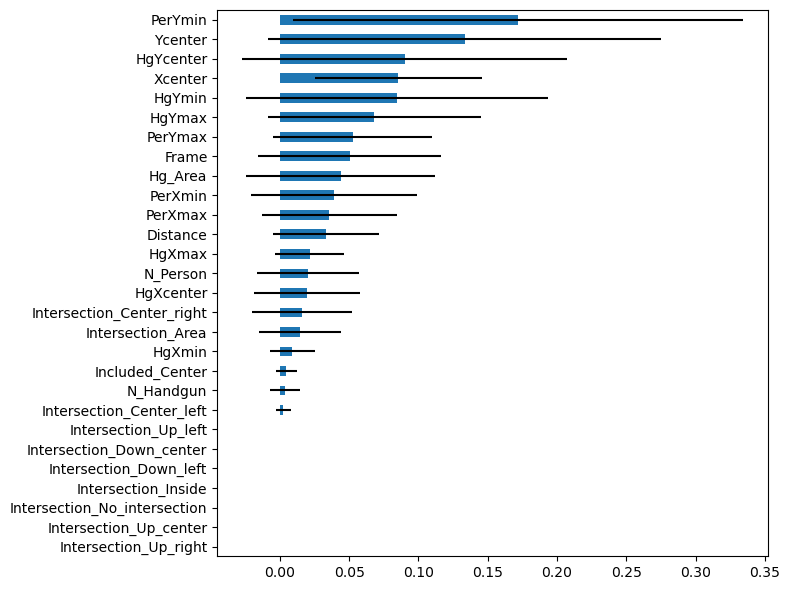

In [16]:
clf.fit(X_train.values, y_train.values)
predictions=clf.predict(X_test.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3206
           1       0.92      0.31      0.47       463

    accuracy                           0.91      3669
   macro avg       0.92      0.65      0.71      3669
weighted avg       0.91      0.91      0.89      3669



In [19]:
# save the model to disk
filename = 'rfc_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

# Redes Neuronales - Todos los predictores

In [18]:
X = df3.drop('Ground_Truth',axis='columns')
y = df3.Ground_Truth

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18345 entries, 0 to 18344
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18345 non-null  int64  
 1   N_Person                      18345 non-null  int64  
 2   Xcenter                       18345 non-null  float64
 3   Ycenter                       18345 non-null  float64
 4   PerXmin                       18345 non-null  float64
 5   PerYmin                       18345 non-null  float64
 6   PerXmax                       18345 non-null  float64
 7   PerYmax                       18345 non-null  float64
 8   N_Handgun                     18345 non-null  int64  
 9   HgXcenter                     18345 non-null  float64
 10  HgYcenter                     18345 non-null  float64
 11  HgXmin                        18345 non-null  float64
 12  HgYmin                        18345 non-null  float64
 13  H

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]
#X_scaled.shape

array([[-1.87112098, -1.00810557,  0.39046869, -1.080838  ,  0.41086279,
        -0.81554075,  0.35420618, -1.46846849, -0.49927941,  0.6538973 ,
        -1.2773251 ,  0.70690299, -1.1940947 ,  0.59948058, -1.35583589,
         1.18677231, -0.05032443, -0.63105082, -0.70152312,  2.74022127,
        -0.27992223, -0.01808789, -0.01044191, -0.54069998, -1.09516052,
        -0.12036921, -0.06188998, -0.14188066],
       [-1.8689275 , -1.00810557,  0.39018351, -1.08024305,  0.40988295,
        -0.81384649,  0.35465105, -1.47126302, -0.49927941,  0.65230398,
        -1.2781833 ,  0.70390382, -1.19474849,  0.5992799 , -1.3569007 ,
         1.18677231, -0.04792132, -0.62519612, -0.70009743,  2.74022127,
        -0.27992223, -0.01808789, -0.01044191, -0.54069998, -1.09516052,
        -0.12036921, -0.06188998, -0.14188066],
       [-1.86673403, -1.00810557,  0.39080284, -1.08241367,  0.41134849,
        -0.8179134 ,  0.35437049, -1.46718461, -0.49927941,  0.65212559,
        -1.27960416,  0.7038

In [21]:
print(scaler.mean_)

[8.53038757e+02 8.83237939e-01 3.92015345e+02 3.83374306e+02
 3.04829840e+02 2.47369111e+02 4.79200849e+02 5.19379502e+02
 3.00844917e-01 3.09762324e+02 3.13640737e+02 2.86364246e+02
 2.94062631e+02 3.33160401e+02 3.33218843e+02 4.15208504e-01
 9.29270192e+02 2.03325580e+03 2.32731036e+02 1.17525211e-01
 7.26628509e-02 3.27064595e-04 1.09021532e-04 2.26219678e-01
 5.45325702e-01 1.42818207e-02 3.81575361e-03 1.97328972e-02]


In [22]:
print(scaler.scale_)

[4.55897169e+02 8.76136358e-01 2.12524354e+02 6.82723582e+01
 2.20383573e+02 1.11541189e+02 2.12929098e+02 3.85546806e+01
 6.02558229e-01 1.53112216e+02 9.67590619e+01 1.52354889e+02
 9.87752935e+01 1.54365640e+02 9.53201666e+01 4.92757955e-01
 1.67602489e+03 1.82512649e+03 1.37714839e+02 3.22045084e-01
 2.59582282e-01 1.80819696e-02 1.04407685e-02 4.18383001e-01
 4.97941343e-01 1.18650117e-01 6.16538209e-02 1.39080948e-01]


In [23]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10) #stratify hace que el ratio entre 0 y 1 se mantenga en la distri. entre el test(y). 

In [24]:
X_train.shape

(13758, 28)

In [25]:
y_train.value_counts()

0    11996
1     1762
Name: Ground_Truth, dtype: int64

In [26]:
X_test.shape

(4587, 28)

In [27]:
y_test.value_counts()

0    3999
1     588
Name: Ground_Truth, dtype: int64

In [28]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,25), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=0, tol=0.000000001)
y_pred = clf.fit(X_train, y_train).predict(X_test)
predictions_mlp=clf.predict_proba(X_test)
predictions_mlp

array([[9.99597339e-01, 4.02661347e-04],
       [1.00000000e+00, 3.08585311e-10],
       [4.20140815e-02, 9.57985918e-01],
       ...,
       [1.00000000e+00, 2.88603710e-15],
       [9.94866800e-01, 5.13320032e-03],
       [9.99999997e-01, 2.56777631e-09]])

In [29]:
predictions_mlp=clf.predict(X_test)
predictions_mlp

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [30]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred)

array([[[ 518,   70],
        [  46, 3953]],

       [[3953,   46],
        [  70,  518]]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3999
           1       0.92      0.88      0.90       588

    accuracy                           0.97      4587
   macro avg       0.95      0.93      0.94      4587
weighted avg       0.97      0.97      0.97      4587



In [32]:
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9834278238116005
Score test =  0.974711140178766


In [34]:
# save the model to disk
filename = 'mlp_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=0).fit(X_train, y_train)
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  1.0
Score test =  0.9626700411262259


In [28]:
# save the model to disk
filename = 'gradboost1.sav'
pickle.dump(clf, open(filename, 'wb'))

In [55]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9746915533059158
Score test =  0.9544447959506486


In [56]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5])

array([[[2613,   21],
        [   9,  518]],

       [[2583,   51],
        [  25,  502]],

       [[2614,   19],
        [  19,  509]],

       [[2621,   13],
        [  28,  499]],

       [[2593,   24],
        [  52,  492]],

       [[2637,   16],
        [  11,  497]]], dtype=int64)

In [35]:
# save the model to disk
filename = 'knn2.sav'
pickle.dump(neigh, open(filename, 'wb'))